In [1]:
import pandas as pd

df = pd.read_csv("/content/dataset3 - Sheet1.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Allen, Mr. William",male,35,0,0,373450,8.05,NaN,S
1,2,0,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113781,26.55,C103,C
2,3,1,3,"Saundercock, Mr. William H.",male,20,0,0,A/5. 2151,7.25,NaN,S
3,4,1,1,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.28,NaN,S
4,5,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.75,NaN,S
5,6,0,3,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.00,NaN,S
6,7,1,2,"Rice, Master. Eugene",male,2,4,1,382652,29.12,NaN,Q
7,8,0,2,"Williams, Mr. Charles Eugene",male,30,0,0,244373,13.00,NaN,S
8,9,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36,1,0,113803,53.10,C123,C
9,10,0,3,"McCarthy, Mr. Timothy J.",male,54,0,0,17463,51.86,E46,S


In [2]:
# prompt: Using dataframe df: perform eda on this code

# Display the first 5 rows of the dataframe
print(df.head())

# Display the last 5 rows of the dataframe
print(df.tail())

# Display information about the dataframe, including data types and non-null values
print(df.info())

# Display descriptive statistics for numerical columns
print(df.describe())

# Display the number of unique values in each column
print(df.nunique())

# Display the count of missing values in each column
print(df.isnull().sum())

   PassengerId  Survived  Pclass                                  Name  \
0            1         1       3                    Allen, Mr. William   
1            2         0       1              Bonnell, Miss. Elizabeth   
2            3         1       3           Saundercock, Mr. William H.   
3            4         1       1           Andersson, Mr. Anders Johan   
4            5         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

      Sex  Age  SibSp  Parch     Ticket   Fare Cabin Embarked  
0    male   35      0      0     373450   8.05   NaN        S  
1  female   58      0      0     113781  26.55  C103        C  
2    male   20      0      0  A/5. 2151   7.25   NaN        S  
3    male   39      1      5     347082  31.28   NaN        S  
4  female   14      0      0     350406   7.75   NaN        S  
   PassengerId  Survived  Pclass  \
5            6         0       3   
6            7         1       2   
7            8         0       2   
8            9         1   

In [6]:
df = df.drop('Cabin',axis=1)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(survival_rate)

Pclass  Sex   
1       female    0.500000
        male      1.000000
2       male      0.500000
3       female    0.000000
        male      0.666667
Name: Survived, dtype: float64


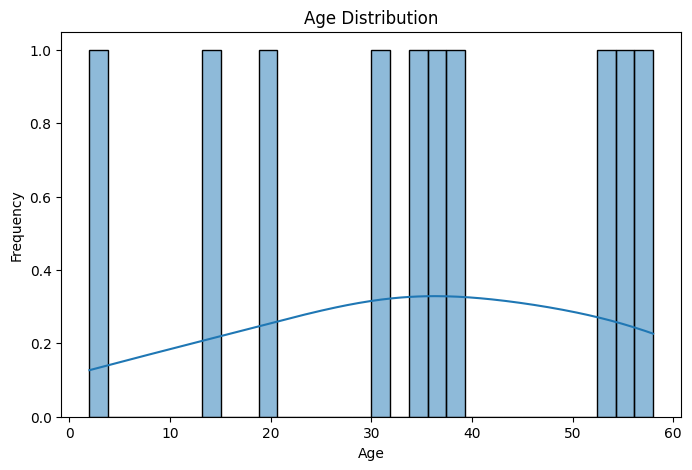

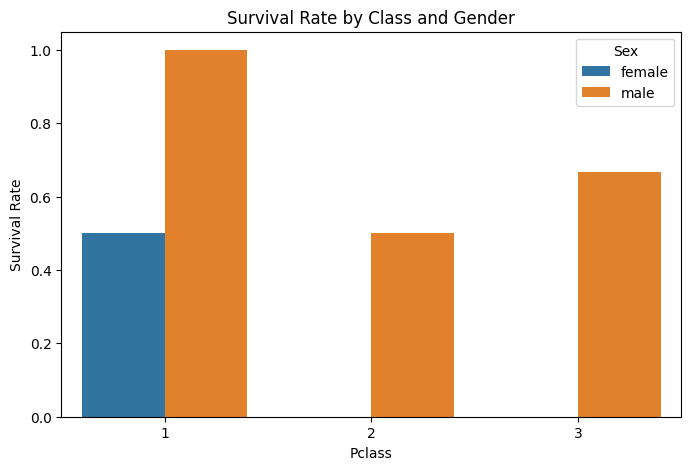

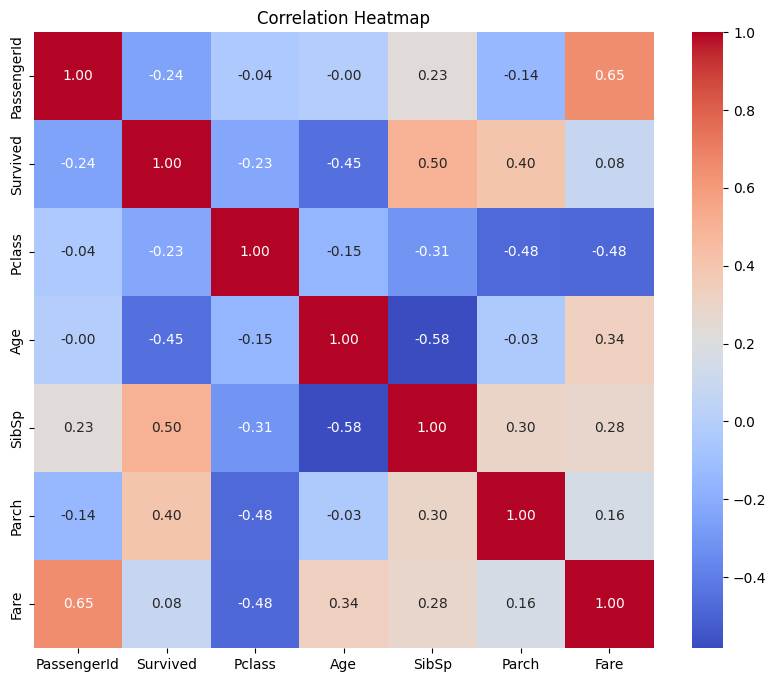

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival by class and gender (barplot)
survival_counts = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=survival_counts, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()